In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
# import umap
import umap.umap_ as umap
from collections import defaultdict

from scipy import linalg, spatial
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, SparsePCA, TruncatedSVD
from sklearn.feature_extraction.text import (CountVectorizer, TfidfTransformer, TfidfVectorizer)

from sklearn.utils.extmath import randomized_svd

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [2]:
# importing csv and converting to df
def create_df(filepath):
    df_all_books = pd.read_json(
        filepath,
        lines=True
    )
    # print(df_all_books.head(3))
    return pd.DataFrame(df_all_books[['title','description']])

In [3]:
def missing_vals(df):
    """
    Outputs missing values in dataframe & removes observations with missing values.
    Input:
    Output:
    """
    print(df.isna().sum())
    # removing rows
    df_clean = df.dropna()
    return df_clean

In [4]:
df = create_df(
    '/Users/angky/Cornell/AML/AML-Project/book_best_001_200.jl'
)
print(df.head(10))

                     title                                        description
0  The Old Man and the Sea  Librarian's note: An alternate cover edition c...
1       The Vampire Lestat  Lestat. The vampire hero of Anne Rice's enthra...
2     The Poisonwood Bible  The Poisonwood Bible is a story told by the wi...
3        Different Seasons  Includes the stories “The Body” and “Rita Hayw...
4            Invisible Man  First published in 1952 and immediately hailed...
5            Battle Royale  Koushun Takami's notorious high-octane thrille...
6    I'll Give You the Sun  At first, Jude and her twin brother Noah, are ...
7    Because of Winn-Dixie  The summer Opal and her father, the preacher, ...
8            Lover Avenged  Rehvenge has always kept his distance from the...
9                Ficciones  The seventeen pieces in Ficciones demonstrate ...


In [5]:
df = missing_vals(df)
df

title          13
description    28
dtype: int64


,title,description
0,The Old Man and the Sea,Librarian's note: An alternate cover edition c...
1,The Vampire Lestat,Lestat. The vampire hero of Anne Rice's enthra...
2,The Poisonwood Bible,The Poisonwood Bible is a story told by the wi...
3,Different Seasons,Includes the stories “The Body” and “Rita Hayw...
4,Invisible Man,First published in 1952 and immediately hailed...
...,...,...
9994,Marlfox,The Redwall series is soon to be a Netflix ori...
9995,A Study in Scarlet Women,"With her inquisitive mind, Charlotte Holmes ha..."
9996,Palace Walk,Volume I of the masterful Cairo Trilogy. A nat...
9997,No Longer Human,Mine has been a life of much shame. I can't ev...


In [6]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Load your dataframe here
# df = pd.read_csv('your_dataframe.csv')

# Stop words set
stop_words = set(stopwords.words('english'))

# Initialize the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Strip non-alphabetic characters and convert to lower case
    text = re.sub('[^A-Za-z]+', ' ', text).lower()
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stop words and lemmatize the remaining tokens
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    # Reconstruct the text from tokens
    return ' '.join(lemmatized_tokens)

# Apply the preprocessing to the description column
df['processed_description'] = df['description'].apply(preprocess_text)

# Show the dataframe
df


[nltk_data] Downloading package stopwords to /Users/angky/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/angky/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/angky/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,title,description,processed_description
0,The Old Man and the Sea,Librarian's note: An alternate cover edition c...,librarian note alternate cover edition found h...
1,The Vampire Lestat,Lestat. The vampire hero of Anne Rice's enthra...,lestat vampire hero anne rice enthralling new ...
2,The Poisonwood Bible,The Poisonwood Bible is a story told by the wi...,poisonwood bible story told wife four daughter...
3,Different Seasons,Includes the stories “The Body” and “Rita Hayw...,includes story body rita hayworth shawshank re...
4,Invisible Man,First published in 1952 and immediately hailed...,first published immediately hailed masterpiece...
...,...,...,...
9994,Marlfox,The Redwall series is soon to be a Netflix ori...,redwall series soon netflix original movie bes...
9995,A Study in Scarlet Women,"With her inquisitive mind, Charlotte Holmes ha...",inquisitive mind charlotte holmes never felt c...
9996,Palace Walk,Volume I of the masterful Cairo Trilogy. A nat...,volume masterful cairo trilogy national best s...
9997,No Longer Human,Mine has been a life of much shame. I can't ev...,mine life much shame even guess must live life...


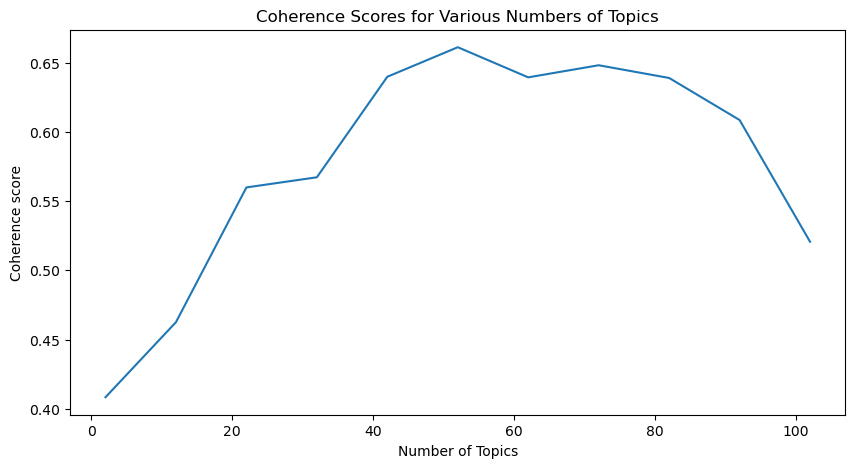

In [7]:
import pandas as pd
from gensim.models import TfidfModel
from gensim.models import LdaMulticore, CoherenceModel
from gensim.corpora import Dictionary
import matplotlib.pyplot as plt

# Assuming you have a dataframe named 'df'
# df = pd.read_csv('your_dataframe.csv') # Replace with the actual loading code if needed

# Convert the 'processed_description' column into a list of lists of tokens
texts = [desc.split() for desc in df['processed_description']]

# Create a dictionary and corpus
dictionary = Dictionary(texts)

# Filter out extremes to limit the number of features
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=100000)

# Create the BoW corpus
corpus_bow = [dictionary.doc2bow(text) for text in texts]

# Create the TF-IDF model using the BoW corpus
tfidf_model = TfidfModel(corpus_bow)

# Apply the TF-IDF model to the entire BoW corpus to create a TF-IDF weighted corpus
corpus_tfidf = [tfidf_model[doc] for doc in corpus_bow]

# Define the range of topics to try
topic_nums = list(range(2, 103, 10))

coherence_values = []
model_list = []

for num_topics in topic_nums:
    # Train LDA model using the TF-IDF corpus
    model = LdaMulticore(corpus=corpus_tfidf, id2word=dictionary, num_topics=num_topics, passes=10)
    model_list.append(model)
    
    # Compute Coherence Score using the TF-IDF corpus
    coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())
# Plotting the coherence scores
plt.figure(figsize=(10, 5))
plt.plot(topic_nums, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.title("Coherence Scores for Various Numbers of Topics")
plt.show()


In [9]:
import pandas as pd
from gensim import corpora, models
from sklearn.cluster import KMeans
from nltk.corpus import stopwords
import numpy as np

# Assuming df is your DataFrame and it has a 'processed_description' column
# df = pd.read_csv('your_dataframe.csv') # Replace with your dataframe loading method

# Prepare the text for LDA
texts = [text.split() for text in df['processed_description']]

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(texts)

# Filter out extremes to limit the number of features
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=100000)

# Convert dictionary into a bag-of-words format
corpus_bow = [dictionary.doc2bow(text) for text in texts]

# Create the TF-IDF model using the BoW corpus
tfidf_model = TfidfModel(corpus_bow)

# Apply the TF-IDF model to the entire BoW corpus to create a TF-IDF weighted corpus
corpus_tfidf = [tfidf_model[doc] for doc in corpus_bow]


# Set parameters for LDA
num_topics = 50  # Adjust the number of topics
passes = 10  # Adequate number of passes through the corpus

# Perform LDA
lda_model = models.LdaMulticore(corpus_tfidf, num_topics=num_topics, id2word=dictionary, passes=passes)

# Extract topic distribution for documents
topics = lda_model.get_document_topics(corpus_tfidf, minimum_probability=0)
print(topics)

# Create a matrix of document-topic probabilities
# Ensure every document topic distribution has a probability for each topic
doc_topic_matrix = np.array([[prob for _, prob in doc] for doc in topics])

doc_topic_matrix



array([[0.003333  , 0.003333  , 0.003333  , ..., 0.003333  , 0.003333  ,
        0.003333  ],
       [0.00304253, 0.00304253, 0.00304253, ..., 0.00304253, 0.00304253,
        0.00304253],
       [0.00294255, 0.00294255, 0.00294255, ..., 0.00294255, 0.00294255,
        0.00294255],
       ...,
       [0.00411915, 0.00411915, 0.00411915, ..., 0.00411915, 0.00411915,
        0.00411915],
       [0.00282381, 0.00282381, 0.00282381, ..., 0.00282381, 0.00282381,
        0.00282381],
       [0.00341579, 0.00341579, 0.00341579, ..., 0.00341579, 0.00341579,
        0.00341579]], dtype=float32)

In [10]:
doc_topic_matrix.shape


(9971, 50)

/Users/angky/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/angky/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/angky/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/angky/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 1

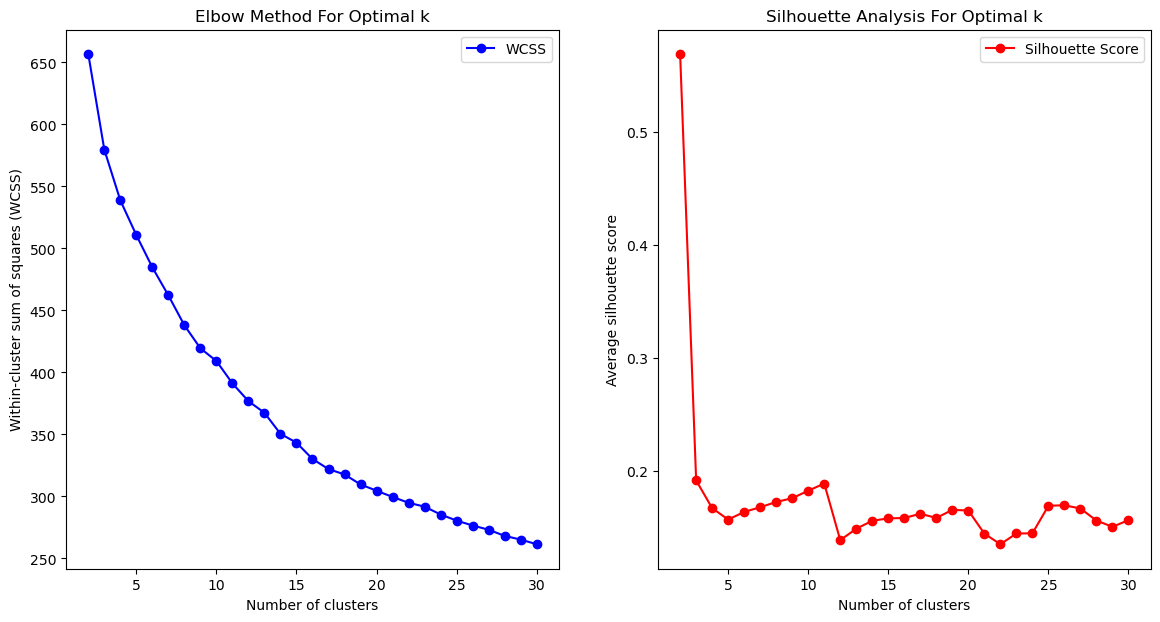

In [12]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Assuming doc_topic_matrix is already defined and is an array-like structure with the document-topic probabilities

# Range of possible clusters to evaluate
range_n_clusters = list(range(2, 31)) # Usually, we start with 2 clusters and go up to 10 or more depending on the data size

# Placeholder for within-cluster sum of squares and silhouette scores
wcss = []
silhouette_avg = []

for n_clusters in range_n_clusters:
    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = kmeans.fit_predict(doc_topic_matrix)
    
    # Compute the within-cluster sum of squares
    wcss.append(kmeans.inertia_)
    
    # Compute the silhouette score
    silhouette_avg.append(silhouette_score(doc_topic_matrix, cluster_labels))

# Plotting the elbow method graph
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(range_n_clusters, wcss, 'bo-', label='WCSS')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares (WCSS)')
plt.legend()

# Plotting the silhouette analysis graph
plt.subplot(1, 2, 2)
plt.plot(range_n_clusters, silhouette_avg, 'ro-', label='Silhouette Score')
plt.title('Silhouette Analysis For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Average silhouette score')
plt.legend()

plt.show()


In [13]:
kmeans = KMeans(n_clusters=11)
df['cluster'] = kmeans.fit_predict(doc_topic_matrix)

# Open a file in write mode
with open('cluster_output.txt', 'w') as file:
    # Print and write the number of books and the first 10 book titles in each cluster
    for i in range(11):
        cluster_books = df[df['cluster'] == i]
        num_books_in_cluster = cluster_books.shape[0]
        cluster_info = f"\nCluster {i}: {num_books_in_cluster} books\n"
        print(cluster_info)
        file.write(cluster_info)

        titles = cluster_books['title'].tolist()
        for title in titles:
            print(title)
            file.write(title + '\n')

/Users/angky/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Cluster 0: 1840 books

The Poisonwood Bible
Different Seasons
Battle Royale
Chasing the Red Queen
Get Rich or Get Lucky
We Are Legion (We Are Bob)
Start with Why: How Great Leaders Inspire Everyone to Take Action
Rule of Wolves
The Sense of an Ending
Zero to One: Notes on Startups, or How to Build the Future
The Ancient Code: A SciFi Adventure
The King of Attolia
The Kiss of Deception
Firelight
Piranesi
Opposition
On the Island
Torn
The Great Book of Amber
The Power of Six
Demonglass
Radio Silence
The Foxhole Court
Switch! The Lost Kingdoms of Karibu
Flatland: A Romance of Many Dimensions
I Remember You
About a Boy
Ghost Story
Night World, No. 3
Punk 57
The DUFF: Designated Ugly Fat Friend
The Ballad of Never After
The School for Good and Evil
Legendborn
Master of the Game
The Fifth Season
Child 44
The Kill Order
Girl in Pieces
Thinking, Fast and Slow
The Complete Stories
The Wrath and the Dawn
The Young Elites
The Boy Who Sneaks in My Bedroom Window
Atomic Habits: An Easy & Proven Wa

In [14]:
required_columns = ['title', 'description', 'processed_description', 'cluster']
clustered_df = df[required_columns]

# Save to CSV
clustered_df.to_csv('clustered_books.csv', index=False)

In [66]:
kmeans = KMeans(n_clusters=9)
df['cluster'] = kmeans.fit_predict(doc_topic_matrix)

# Print the number of books and the first 10 book titles in each cluster
for i in range(9):
    cluster_books = df[df['cluster'] == i]
    num_books_in_cluster = cluster_books.shape[0]
    print(f"\nCluster {i}: {num_books_in_cluster} books")
    titles = cluster_books['title'].head(10).tolist()
    for title in titles:
        print(title)

/Users/angky/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Cluster 0: 622 books
The Hunger Games
Jonathan Livingston Seagull
Stardust
The Hunchback of Notre-Dame
The Things They Carried
Because of Winn-Dixie
Ficciones
Smilla's Sense of Snow
The Dispossessed: An Ambiguous Utopia
Old Man's War

Cluster 1: 14 books
Contact
Les Liaisons dangereuses
Heaven is for Real: A Little Boy's Astounding Story of His Trip to Heaven and Back
The Book of Disquiet: The Complete Edition
Cujo
Maus I: Un Survivant Raconte: Mon Père Saigne L'histoire
Ubik
Momo
Rubinrot
Demian. Die Geschichte von Emil Sinclairs Jugend

Cluster 2: 147 books
River God
The Blue Sword
As You Like It
The Pandarus File
Lullaby
Centennial
The Dead Girls' Dance
Labyrinths: Selected Stories & Other Writings
The Light Between Oceans
The Spanish Love Deception

Cluster 3: 149 books
The Gathering Storm
Survival in Auschwitz
The Storyteller
The Sword of Shannara
People of the Book
Cheaper by the Dozen
Angels' Blood
Lola and the Boy Next Door
Tomorrow, When the War Began
The Language of Flowers
